In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn import metrics as skm
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras import initializers
from keras.models import load_model
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate
from keras.layers.recurrent import LSTM, GRU
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from time import time
from keras import metrics

from statistics import mean

from tensorflow.keras.callbacks import EarlyStopping

# early_stopping_monitor = EarlyStopping(patience=3)

Using TensorFlow backend.


In [6]:
# Load the csv file

df = pd.read_csv("../data/classifier/FinalScores/eight1.csv")
df = df[(df.vader!=0)]
df = df[(df.perc!=0)]
df = df[["vader","secscore","assoc","perc"]]

# predictors = ['vader','secscore','assoc']
predictors = ['vader']
target = ['perc']

print(df.head())

    vader  secscore  assoc  perc
4    0.30      0.00   0.05 -3.97
11   0.38      0.60   0.08 -1.31
16  -0.42     -0.02  -0.42  3.02
17   0.29      0.00   0.00  1.80
21   0.56      0.00   0.04 -1.70


In [7]:
# Create training and testing datasets

X = df.drop(target, axis=1).values
Y = df[['perc']].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X.shape,Y.shape)

(15291, 3) (15291, 1)
(3823, 3) (3823, 1)
(19114, 3) (19114, 1)


In [8]:
def getAcc(strins, model,X_test,y_test):
    predictions = model.predict(X_test)
    y_pred = []
    test_y = []
    for y in predictions.tolist():
        if y[0]>0:
            y_pred.append(1)
        else:
            y_pred.append(-1)
            

    for y in y_test.tolist():
        if y[0]>0:
            test_y.append(1)
        else:
            test_y.append(-1)

    acc = round(accuracy_score(test_y,y_pred)*100,2)
    cf = skm.confusion_matrix(test_y,y_pred)
    print("Accuracy  = {}\nConfusion = \n{}".format(acc,cf))
#     print(acc,strins)    
    return(acc)

In [16]:
#compile the model
# lossss = ['mean_squared_error','mean_absolute_error','squared_hinge','logcosh','sparse_categorical_crossentropy','poisson'] 
# activationsss = ['elu','relu','softmax','selu','sigmoid','linear','tanh']
# optimizersss = ['rmsprop','adam','sgd','adagrad','adadelta','adamax','nadam']

optimizersss = ['rmsprop','adam','sgd','adagrad','adadelta','adamax']
lossss = ['mean_squared_error','mean_absolute_error','squared_hinge'] 
activationsss = ['relu','softmax','selu','sigmoid','linear']

optimizer='adamax'
activation='selu'
losss='squared_hinge'

results = []

ts = time()
strins = ""
# for optimizer in optimizersss:
#   for losss in lossss:
#     for activation in activationsss:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation=activation,input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(132, activation=activation))
model.add(tf.keras.layers.Dense(64, activation=activation))
model.add(tf.keras.layers.Dense(1))
model.compile(loss=losss, optimizer=optimizer,metrics=[metrics.mae, metrics.categorical_accuracy,metrics.accuracy])


# Train the model
# train_model = model.fit(X_train[0:],y_train[0:],epochs=20,verbose=True,callbacks=[early_stopping_monitor])
train_model = model.fit(X_train[0:],y_train[0:],epochs=1000,verbose=True)
strins = ","+optimizer+","+losss+","+activation
# Get Accuracy
results = getAcc(strins,model,X_test,y_test)
        
# print("Predictors: {} - Acc: {}".format(predictors,mean(results)))
print("Took ", time() - ts)

Train on 15291 samples
Epoch 1/1000
15291/15291 [==============================] - 1s 46us/sample - loss: 1.0134 - mean_absolute_error: 1.5493 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 2/1000
15291/15291 [==============================] - 0s 29us/sample - loss: 1.0019 - mean_absolute_error: 1.5482 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 3/1000
15291/15291 [==============================] - 0s 29us/sample - loss: 1.0032 - mean_absolute_error: 1.5487 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 4/1000
15291/15291 [==============================] - 1s 34us/sample - loss: 1.0001 - mean_absolute_error: 1.5480 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 5/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9992 - mean_absolute_error: 1.5490 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 6/1000
15291/15291 [==============================] - 0s 29us/sample - loss: 0.9971 - mean_absolute_e

15291/15291 [==============================] - 0s 32us/sample - loss: 0.9880 - mean_absolute_error: 1.5476 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 48/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9870 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 49/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9880 - mean_absolute_error: 1.5477 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 50/1000
15291/15291 [==============================] - 1s 39us/sample - loss: 0.9877 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 51/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9875 - mean_absolute_error: 1.5476 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 52/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9878 - mean_absolute_error: 1.5474 - categorical_accu

15291/15291 [==============================] - 0s 30us/sample - loss: 0.9868 - mean_absolute_error: 1.5474 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 94/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9870 - mean_absolute_error: 1.5475 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 95/1000
15291/15291 [==============================] - 1s 34us/sample - loss: 0.9865 - mean_absolute_error: 1.5475 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 96/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9868 - mean_absolute_error: 1.5473 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 97/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9864 - mean_absolute_error: 1.5473 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 98/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9867 - mean_absolute_error: 1.5475 - categorical_accu

15291/15291 [==============================] - 0s 29us/sample - loss: 0.9864 - mean_absolute_error: 1.5474 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 140/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9865 - mean_absolute_error: 1.5475 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 141/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9860 - mean_absolute_error: 1.5473 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 142/1000
15291/15291 [==============================] - 0s 29us/sample - loss: 0.9860 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 143/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9859 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 144/1000
15291/15291 [==============================] - 0s 33us/sample - loss: 0.9859 - mean_absolute_error: 1.5469 - categorical

15291/15291 [==============================] - 0s 32us/sample - loss: 0.9846 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 186/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9865 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 187/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9863 - mean_absolute_error: 1.5474 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 188/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9856 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+000s - loss: 0.9849 - mean_absolute_error: 1.5463 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+
Epoch 189/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9858 - mean_absolute_error: 1.5473 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 190/1000
15291/15291 [========

Epoch 230/1000
15291/15291 [==============================] - 1s 33us/sample - loss: 0.9856 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 231/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9860 - mean_absolute_error: 1.5474 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 232/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9856 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 233/1000
15291/15291 [==============================] - 1s 38us/sample - loss: 0.9854 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 234/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9854 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 235/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9855 - mean_absolute_error: 1.547

15291/15291 [==============================] - 0s 31us/sample - loss: 0.9850 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 276/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9848 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 277/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9851 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 278/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9844 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 279/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9853 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 280/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9843 - mean_absolute_error: 1.5469 - categorical

15291/15291 [==============================] - 1s 37us/sample - loss: 0.9851 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 322/1000
15291/15291 [==============================] - 1s 33us/sample - loss: 0.9847 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 323/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9842 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 324/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9846 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 325/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9850 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 326/1000
15291/15291 [==============================] - 1s 37us/sample - loss: 0.9853 - mean_absolute_error: 1.5472 - categorical

15291/15291 [==============================] - 0s 31us/sample - loss: 0.9848 - mean_absolute_error: 1.5466 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 368/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9848 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 369/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9839 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 370/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9849 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 371/1000
15291/15291 [==============================] - 1s 34us/sample - loss: 0.9851 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 372/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9848 - mean_absolute_error: 1.5470 - categorical

15291/15291 [==============================] - 1s 36us/sample - loss: 0.9845 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 414/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9850 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 415/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9850 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 416/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9845 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 417/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9844 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 418/1000
15291/15291 [==============================] - 1s 36us/sample - loss: 0.9845 - mean_absolute_error: 1.5471 - categorical

15291/15291 [==============================] - 1s 35us/sample - loss: 0.9843 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 460/1000
15291/15291 [==============================] - 1s 33us/sample - loss: 0.9842 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 461/1000
15291/15291 [==============================] - 1s 40us/sample - loss: 0.9839 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 462/1000
15291/15291 [==============================] - 1s 37us/sample - loss: 0.9850 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 463/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9844 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 464/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9841 - mean_absolute_error: 1.5471 - categorical

15291/15291 [==============================] - 1s 33us/sample - loss: 0.9837 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 506/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9842 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 507/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9842 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 508/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9840 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 509/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9834 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 510/1000
15291/15291 [==============================] - 1s 37us/sample - loss: 0.9844 - mean_absolute_error: 1.5468 - categorical

15291/15291 [==============================] - 0s 32us/sample - loss: 0.9839 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 552/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9839 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 553/1000
15291/15291 [==============================] - 1s 34us/sample - loss: 0.9833 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 554/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9843 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 555/1000
15291/15291 [==============================] - 1s 33us/sample - loss: 0.9842 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 556/1000
15291/15291 [==============================] - 1s 39us/sample - loss: 0.9837 - mean_absolute_error: 1.5470 - categorical

15291/15291 [==============================] - 0s 32us/sample - loss: 0.9842 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 598/1000
15291/15291 [==============================] - 1s 34us/sample - loss: 0.9844 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 599/1000
15291/15291 [==============================] - 1s 42us/sample - loss: 0.9840 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 600/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9844 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 601/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9839 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 602/1000
15291/15291 [==============================] - 1s 34us/sample - loss: 0.9833 - mean_absolute_error: 1.5466 - categorical

15291/15291 [==============================] - 1s 34us/sample - loss: 0.9840 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 644/1000
15291/15291 [==============================] - 1s 42us/sample - loss: 0.9836 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 645/1000
15291/15291 [==============================] - 1s 39us/sample - loss: 0.9841 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 646/1000
15291/15291 [==============================] - 1s 37us/sample - loss: 0.9840 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 647/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9843 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 648/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9840 - mean_absolute_error: 1.5468 - categorical

15291/15291 [==============================] - 1s 34us/sample - loss: 0.9838 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 690/1000
15291/15291 [==============================] - 1s 37us/sample - loss: 0.9841 - mean_absolute_error: 1.5465 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 691/1000
15291/15291 [==============================] - 1s 46us/sample - loss: 0.9835 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 692/1000
15291/15291 [==============================] - 1s 44us/sample - loss: 0.9836 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 693/1000
15291/15291 [==============================] - 1s 44us/sample - loss: 0.9838 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 694/1000
15291/15291 [==============================] - 1s 46us/sample - loss: 0.9840 - mean_absolute_error: 1.5466 - categorical

15291/15291 [==============================] - 1s 36us/sample - loss: 0.9825 - mean_absolute_error: 1.5465 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 736/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9839 - mean_absolute_error: 1.5472 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 737/1000
15291/15291 [==============================] - 1s 36us/sample - loss: 0.9837 - mean_absolute_error: 1.5466 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 738/1000
15291/15291 [==============================] - 1s 38us/sample - loss: 0.9838 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 739/1000
15291/15291 [==============================] - 1s 37us/sample - loss: 0.9839 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 740/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9838 - mean_absolute_error: 1.5467 - categorical

15291/15291 [==============================] - 0s 31us/sample - loss: 0.9841 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 781/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9841 - mean_absolute_error: 1.5468 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 782/1000
15291/15291 [==============================] - 1s 37us/sample - loss: 0.9833 - mean_absolute_error: 1.5466 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 783/1000
15291/15291 [==============================] - 0s 31us/sample - loss: 0.9836 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 784/1000
15291/15291 [==============================] - 0s 30us/sample - loss: 0.9834 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 785/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9832 - mean_absolute_error: 1.5467 - categorical

15291/15291 [==============================] - 1s 35us/sample - loss: 0.9833 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 827/1000
15291/15291 [==============================] - 1s 36us/sample - loss: 0.9834 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 828/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9823 - mean_absolute_error: 1.5464 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 829/1000
15291/15291 [==============================] - 1s 38us/sample - loss: 0.9841 - mean_absolute_error: 1.5465 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 830/1000
15291/15291 [==============================] - 1s 34us/sample - loss: 0.9833 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 831/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9833 - mean_absolute_error: 1.5465 - categorical

15291/15291 [==============================] - 1s 38us/sample - loss: 0.9835 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 873/1000
15291/15291 [==============================] - 1s 33us/sample - loss: 0.9838 - mean_absolute_error: 1.5469 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+000s - loss: 0.9807 - mean_absolute_error: 1.5228 - categorical_accuracy: 1.0000 - accuracy: 0
Epoch 874/1000
15291/15291 [==============================] - 1s 33us/sample - loss: 0.9831 - mean_absolute_error: 1.5465 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 875/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9830 - mean_absolute_error: 1.5465 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 876/1000
15291/15291 [==============================] - 1s 37us/sample - loss: 0.9839 - mean_absolute_error: 1.5471 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 877/1000
15291/15291 [===============

15291/15291 [==============================] - 0s 33us/sample - loss: 0.9823 - mean_absolute_error: 1.5462 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 919/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9828 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 920/1000
15291/15291 [==============================] - 0s 33us/sample - loss: 0.9831 - mean_absolute_error: 1.5470 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 921/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9837 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 922/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9833 - mean_absolute_error: 1.5467 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 923/1000
15291/15291 [==============================] - 0s 32us/sample - loss: 0.9838 - mean_absolute_error: 1.5466 - categorical

15291/15291 [==============================] - 1s 36us/sample - loss: 0.9828 - mean_absolute_error: 1.5465 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 965/1000
15291/15291 [==============================] - 1s 41us/sample - loss: 0.9834 - mean_absolute_error: 1.5465 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 966/1000
15291/15291 [==============================] - 1s 33us/sample - loss: 0.9832 - mean_absolute_error: 1.5466 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 967/1000
15291/15291 [==============================] - 1s 35us/sample - loss: 0.9828 - mean_absolute_error: 1.5464 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 968/1000
15291/15291 [==============================] - 1s 34us/sample - loss: 0.9823 - mean_absolute_error: 1.5465 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 969/1000
15291/15291 [==============================] - 1s 36us/sample - loss: 0.9834 - mean_absolute_error: 1.5465 - categorical

[0.9848762486512954, 1.5326259, 1.0, 0.0]


Text(0, 0.5, 'Predictions')

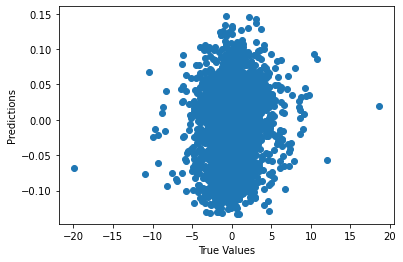

In [10]:
#Evaluate
results = (model.evaluate(X_test,y_test, batch_size=10,verbose=False))
print(results)
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

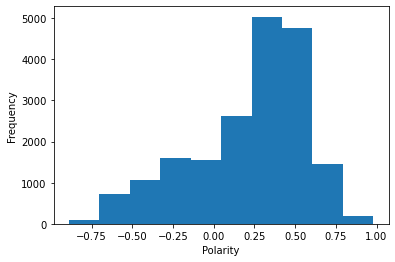

In [11]:
df['vader'].plot(kind='hist')
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

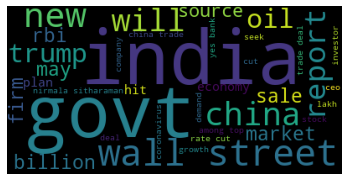

In [14]:
from wordcloud import WordCloud, STOPWORDS 
df2 = pd.read_csv("../data/news/firstpost/firstpost-merged.csv") 
df2 = df2['headline']
df2.head()

stopwords = set(STOPWORDS)
stopwords.add('say')
stopwords.add('says')
stopwords.add('rs')
stopwords.add('cr')

comment_words = ' '
for idx,val in enumerate(df2): 
      
  # typecaste each val to string 
  val = str(val) 

  # split the value 
  tokens = val.split() 
    
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower() 
        
  for words in tokens: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(stopwords = stopwords,min_font_size = 10).generate(comment_words) 
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# save model
model.save("./models/model2.h5")

#load model
model = tf.keras.models.load_model('./models/model2.h5')